<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/NLP/4-6-RNN-predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

input_shape is set at 3×1, and a linear activation function is used in both layers for simplicity. Just to recall, the linear activation function
 makes no change in the input. The network looks as follows:

If we have
 hidden units (
 in the above case), then:

Input:
Hidden unit:
Weights for the input units:
Weights for the hidden units:
Bias for the hidden units:
Weight for the dense layer:
Bias for the dense layer:

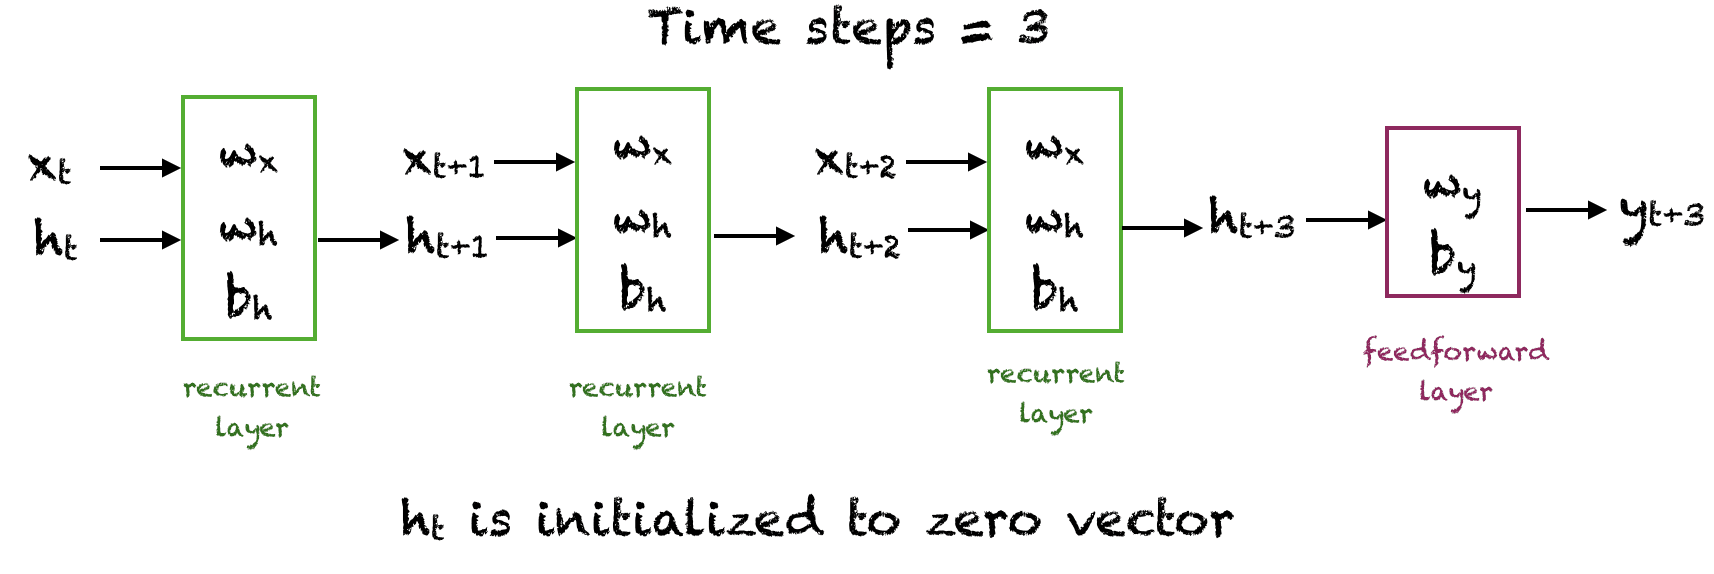

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[ 1.2462415  -0.01766288]]  wh =  [[ 0.0364325  -0.99933606]
 [ 0.99933606  0.03643256]]  bh =  [0. 0.]  wy = [[-1.2085531 ]
 [ 0.34657526]] by =  [0.]


In [ ]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
h1 =  [[ 1.24624145 -0.01766288]] h2 =  [[ 2.52023544 -1.2813833 ]] h3 =  [[ 2.5500103  -2.61823489]]
Prediction from network  [[-3.9892383]]
Prediction from our computation  [[-3.98923823]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
187/187 - 7s - 35ms/step - loss: 0.0188
Epoch 2/20
187/187 - 1s - 6ms/step - loss: 0.0060
Epoch 3/20
187/187 - 1s - 7ms/step - loss: 0.0055
Epoch 4/20
187/187 - 1s - 6ms/step - loss: 0.0050
Epoch 5/20
187/187 - 1s - 4ms/step - loss: 0.0047
Epoch 6/20
187/187 - 1s - 5ms/step - loss: 0.0046
Epoch 7/20
187/187 - 1s - 4ms/step - loss: 0.0044
Epoch 8/20
187/187 - 1s - 3ms/step - loss: 0.0043
Epoch 9/20
187/187 - 1s - 3ms/step - loss: 0.0042
Epoch 10/20
187/187 - 1s - 3ms/step - loss: 0.0041
Epoch 11/20
187/187 - 1s - 3ms/step - loss: 0.0041
Epoch 12/20
187/187 - 0s - 3ms/step - loss: 0.0040
Epoch 13/20
187/187 - 0s - 2ms/step - loss: 0.0040
Epoch 14/20
187/187 - 1s - 3ms/step - loss: 0.0038
Epoch 15/20
187/187 - 1s - 3ms/step - loss: 0.0039
Epoch 16/20
187/187 - 0s - 2ms/step - loss: 0.0039
Epoch 17/20
187/187 - 0s - 2ms/step - loss: 0.0038
Epoch 18/20
187/187 - 0s - 2ms/step - loss: 0.0038
Epoch 19/20
187/187 - 1s - 3ms/step - loss: 0.0038
Epoch 20/20
187/187 - 1s - 3ms/step - l

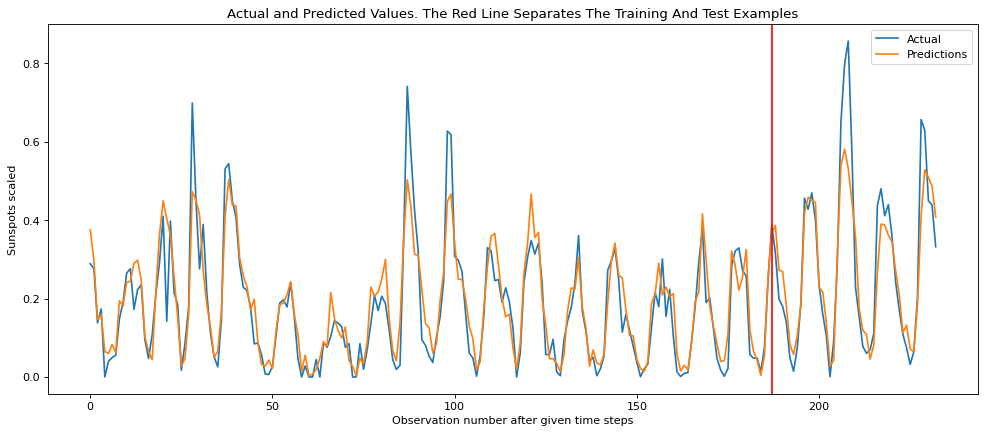

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)